${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\operatorname {exp} \left(-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}\right)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\quad -\infty <x<\infty }$





In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

size = 100
mean = 0
sig = 8
x_min = -size + mean
x_max = size + mean
n = x_max-x_min+1
index = np.arange(n)

In [37]:
x = np.zeros(shape=(n),dtype=int)
for i in index:
    x[i] = x_min+i

In [38]:
f = np.zeros(shape=(n))
y = np.zeros(shape=(n))
for i in index:
    f[i] = math.pow(2*math.pi*sig,-1/2) * math.exp(-math.pow((x[i]-mean)/sig,2)/2)
    if x[i]-mean >= -size/10 and x[i]-mean <= size/10:
        y[i] = 1
    else:
        y[i] = 0
    #f[i] = np.random.random_sample()


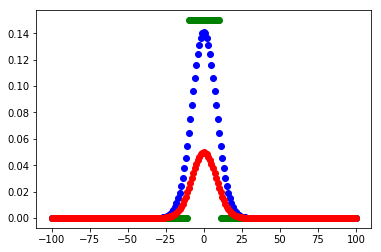

In [39]:
norm = 0
for i in index:
    norm += f[i]
f_norm = np.true_divide(f , norm)
plt.plot(x, 0.15*y, 'go', x, f, 'bo', x, f_norm,'ro')
plt.show()

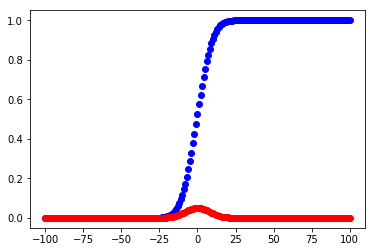

[5.86899420e-36 3.36505065e-35 1.63118445e-34 7.57113369e-34
 3.44009304e-33 1.53708000e-32 6.76018943e-32 2.92717820e-31
 1.24792475e-30 5.23820000e-30 2.16487220e-29 8.80927703e-29
 3.52945177e-28 1.39230497e-27 5.40782731e-27 2.06811079e-26
 7.78733028e-26 2.88714438e-25 1.05393755e-24 3.78816699e-24
 1.34064153e-23 4.67161490e-23 1.60285328e-22 5.41495043e-22
 1.80123697e-21 5.89962764e-21 1.90264399e-20 6.04187194e-20
 1.88915889e-19 5.81634903e-19 1.76327289e-18 5.26353935e-18
 1.54713339e-17 4.47787062e-17 1.27617924e-16 3.58138264e-16
 9.89672149e-16 2.69299987e-15 7.21586793e-15 1.90393058e-14
 4.94683124e-14 1.26566812e-13 3.18884056e-13 7.91169624e-13
 1.93300968e-12 4.65082547e-12 1.10194979e-11 2.57118713e-11
 5.90813290e-11 1.33695358e-10 2.97945585e-10 6.53909207e-10
 1.41339456e-09 3.00871284e-09 6.30776684e-09 1.30243077e-08
 2.64865077e-08 5.30509419e-08 1.04656829e-07 2.03355676e-07
 3.89195615e-07 7.33688440e-07 1.36237685e-06 2.49192534e-06
 4.48989298e-06 7.969147

In [40]:
cdf = np.zeros(shape = (n))
cdf[0] = f_norm[0]
for i in range(1,n):
    cdf[i] = cdf[i-1]+f_norm[i]
plt.plot(x, cdf, 'bo',  x, f_norm,'ro')
plt.show()
print(cdf)

average x: 0.000001
0.10450433644493032
0.1044776119402985
0.014071776740030795


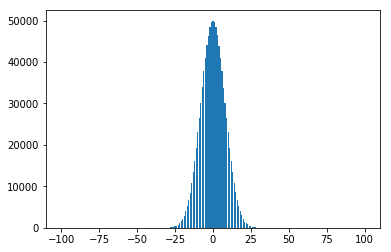

In [45]:
nSample = 1000000
smp_x = np.zeros(shape = (nSample), dtype=int)
smp = np.zeros(shape = (nSample))

amount = np.zeros(shape=(n))

upper = n
lower = 0
for i in range(nSample):
    idx = np.nonzero((cdf-np.random.random_sample()).clip(min=0))[0][0]
    smp_x[i] = idx
    amount[idx] += 1
    smp[i] = y[idx]*(1/(x_max-x_min+1)/(f_norm[idx]))
    smp_u
    #print("true" if f_norm[idx] == cdf[idx]-(cdf[idx-1] if idx >= 1 else 0) else "false" , \
    #      f_norm[idx] , "  <>  " , cdf[idx]-(cdf[idx-1]))
    
   

print( "average x: {:f}".format(x_min + np.average(smp_x)))
print(np.average(smp))
print(np.average(y))
print(np.average(f))

plt.bar(x, amount, align='center')
plt.show()